In [2]:
import pandas as pd

In [110]:
df = pd.read_csv('jwst_page2.csv')

In [111]:
df.head()

,web-scraper-order,web-scraper-start-url,articles-link,articles-link-href,summary-selector,title-selector,whole-article-selector
0,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,https://webbtelescope.org/contents/news-releas...,The amount of infrared light coming from TRAPP...,NASA's Webb Measures the Temperature of a Rock...,NaN
1,1752149623-2,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,https://webbtelescope.org/contents/news-releas...,"Acting as a giant touch-free thermometer, NASA...",NASA's Webb Measures the Temperature of a Rock...,NaN
2,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,https://webbtelescope.org/contents/news-releas...,NaN,NASA's Webb Measures the Temperature of a Rock...,An international team of researchers has used ...
3,1752149623-4,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,https://webbtelescope.org/contents/news-releas...,NaN,NASA's Webb Measures the Temperature of a Rock...,This is the first detection of any form of lig...
4,1752149623-5,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,https://webbtelescope.org/contents/news-releas...,NaN,NASA's Webb Measures the Temperature of a Rock...,“These observations really take advantage of W...


In [112]:
# how many rows and columns
df.shape

(762, 7)

In [113]:
# column names
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'articles-link',
       'articles-link-href', 'summary-selector', 'title-selector',
       'whole-article-selector'],
      dtype='object')

In [114]:
# how many unique values in articles-link column and also print those values
df['articles-link'].unique()
df['articles-link'].nunique()

50

In [115]:
# are the columns articles-link and title-selector same?
(df["articles-link"] == df["title-selector"]).all()

np.True_

In [116]:
# remove title selector column and rename articles-link to title
df = df.drop(columns=["title-selector","articles-link-href"])
df = df.rename(columns={"articles-link":"title", "summary-selector":"summary", "whole-article-selector":"whole-article"})

In [117]:
# get those rows where summary is Lee esta historia en español. but whole-article is not null
filtered_rows = df[(df["summary"] == "Lee esta historia en español.") ]

filtered_rows["whole-article"].isna().all()

np.True_

In [118]:
#remove all rows where summary is Lee esta historia en español. but whole-article is not null
df = df.drop(filtered_rows.index).reset_index(drop=True)

In [119]:
# check if there are rows where summary and whole-article are both null
df[(df["summary"].isna()) & (df["whole-article"].isna())]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
102,1752149646-103,https://webbtelescope.org/news/news-releases?i...,Webb Looks for Fomalhaut's Asteroid Belt and F...,NaN,NaN


In [120]:
# remove rows where summary and whole-article are both null
df = df.drop(df[(df["summary"].isna()) & (df["whole-article"].isna())].index).reset_index(drop=True)

In [121]:
# check if there are rows where whole-article is https://science.nasa.gov/webb
df[df["whole-article"]=="https://science.nasa.gov/webb"]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article


In [122]:
df = df.drop(df[df["whole-article"]=="https://science.nasa.gov/webb"].index).reset_index(drop=True)

In [123]:
# check if there are rows where whole-article is that string
df[df["whole-article"] == "The James Webb Space Telescope is the world's premier space science observatory. Webb will solve mysteries in our solar system, look beyond to distant worlds around other stars, and probe the mysterious structures and origins of our universe and our place in it. Webb is an international program led by NASA with its partners, ESA (European Space Agency), and CSA (Canadian Space Agency)."]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
131,1752149654-133,https://webbtelescope.org/news/news-releases?i...,Webb Maps Surprisingly Large Plume Jetting Fro...,NaN,The James Webb Space Telescope is the world's ...
146,1752149658-148,https://webbtelescope.org/news/news-releases?i...,Early Universe Crackled With Bursts of Star Fo...,NaN,The James Webb Space Telescope is the world's ...
209,1752149673-211,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Identifies the Earliest Strands of...,NaN,The James Webb Space Telescope is the world's ...
225,1752149677-227,https://webbtelescope.org/news/news-releases?i...,Webb Locates Dust Reservoirs in Two Supernovae,NaN,The James Webb Space Telescope is the world's ...


In [124]:
df = df.drop(df[df["whole-article"]=="The James Webb Space Telescope is the world's premier space science observatory. Webb will solve mysteries in our solar system, look beyond to distant worlds around other stars, and probe the mysterious structures and origins of our universe and our place in it. Webb is an international program led by NASA with its partners, ESA (European Space Agency), and CSA (Canadian Space Agency)."].index).reset_index(drop=True)

In [125]:
# check if there are rows where whole-article is that string
df[df["whole-article"] == "The James Webb Space Telescope is the world's premier space science observatory. The Fomalhaut observations utilized the Mid-Infrared Instrument (MIRI), which was contributed by NASA and ESA (European Space Agency), with the instrument designed and built by a consortium of nationally funded European Institutes (the MIRI European Consortium) and NASA’s Jet Propulsion Laboratory, in partnership with the University of Arizona. Webb will solve mysteries in our solar system, look beyond to distant worlds around other stars, and probe the mysterious structures and origins of our universe and our place in it. Webb is an international program led by NASA with its partners, ESA, and the Canadian Space Agency."]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
101,1752149646-102,https://webbtelescope.org/news/news-releases?i...,Webb Looks for Fomalhaut's Asteroid Belt and F...,NaN,The James Webb Space Telescope is the world's ...


In [126]:
df = df.drop(df[df["whole-article"]=="The James Webb Space Telescope is the world's premier space science observatory. The Fomalhaut observations utilized the Mid-Infrared Instrument (MIRI), which was contributed by NASA and ESA (European Space Agency), with the instrument designed and built by a consortium of nationally funded European Institutes (the MIRI European Consortium) and NASA’s Jet Propulsion Laboratory, in partnership with the University of Arizona. Webb will solve mysteries in our solar system, look beyond to distant worlds around other stars, and probe the mysterious structures and origins of our universe and our place in it. Webb is an international program led by NASA with its partners, ESA, and the Canadian Space Agency."].index).reset_index(drop=True)

In [127]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'title', 'summary',
       'whole-article'],
      dtype='object')

In [128]:
df["title"].nunique()

50

C:\Users\HP\AppData\Local\Temp\ipykernel_19084\3397680982.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


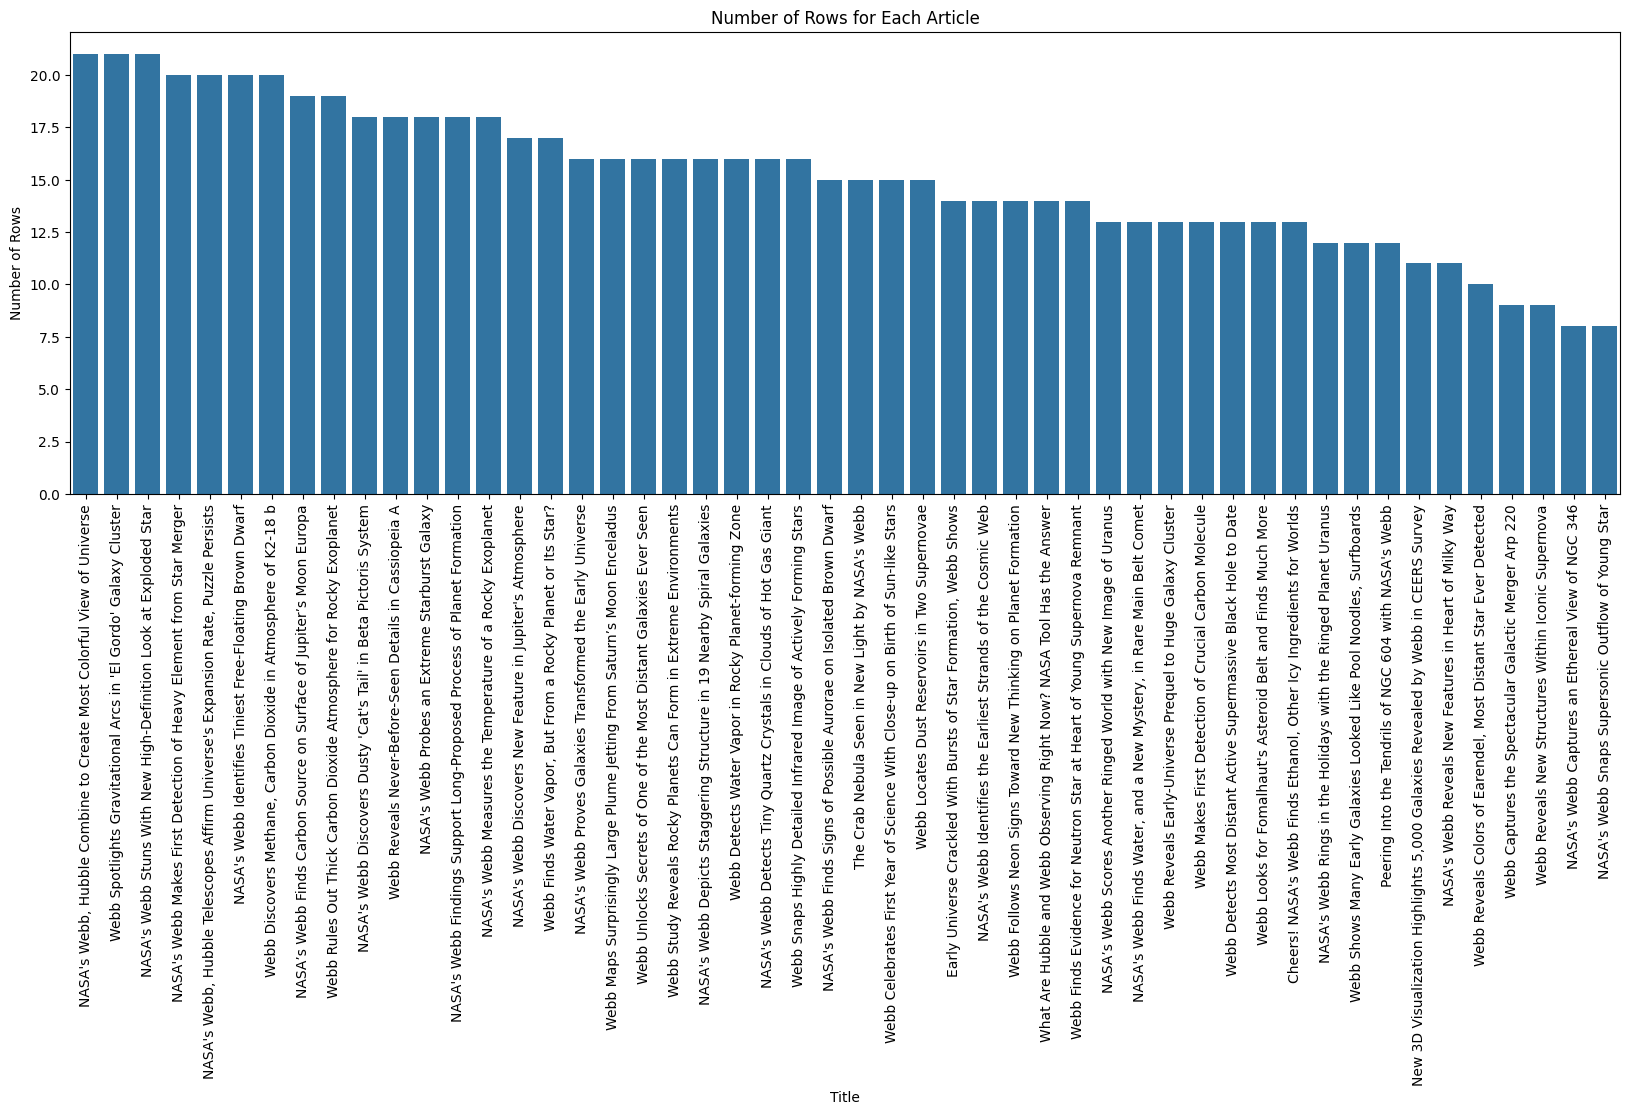

In [129]:
# now we are going to plot the number of rows for each article
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df["title"].value_counts() # this will give us the count or number of rows taken up by each
plt.figure(figsize=(20, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Title") 
plt.ylabel("Number of Rows")
plt.title("Number of Rows for Each Article")
plt.tight_layout()
plt.show()


In [130]:
# now let's take a title
title="NASA's Webb Measures the Temperature of a Rocky Exoplanet"
#print rows where title is this
current_title_df = df[df["title"] == title]
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN
1,1752149623-2,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,"Acting as a giant touch-free thermometer, NASA...",NaN
2,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...
3,1752149623-4,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,This is the first detection of any form of lig...
4,1752149623-5,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“These observations really take advantage of W...
5,1752149623-6,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"In early 2017, astronomers reported the discov..."
6,1752149623-7,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"TRAPPIST-1 b, the innermost planet, has an orb..."
7,1752149623-8,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“There are ten times as many of these stars in...
8,1752149623-9,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Co-author Elsa Ducrot from the French Alternat...
9,1752149623-10,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Previous observations of TRAPPIST-1 b with the...


In [131]:
# first merge all rows where summary exists and whole-article-selector is null

# first we filter the rows where summary exists
filtered_rows = current_title_df[current_title_df["summary"].notnull() & current_title_df["whole-article"].isna()]
filtered_rows

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN
1,1752149623-2,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,"Acting as a giant touch-free thermometer, NASA...",NaN


In [132]:
# then we combine the summaries of these rows into a single summary
merged_summary = " ".join(filtered_rows["summary"].astype(str))
print("Merged Summary:")
print(merged_summary)

Merged Summary:
The amount of infrared light coming from TRAPPIST-1 b suggests that the planet is devoid of any significant atmosphere. Acting as a giant touch-free thermometer, NASA’s James Webb Space Telescope has successfully measured heat radiating from the innermost of the seven rocky planets orbiting TRAPPIST-1, a cool red dwarf star 40 light-years from Earth. With a dayside temperature of 450 degrees Fahrenheit, the planet is just about perfect for baking pizza. But with no atmosphere to speak of, it may not be the best spot to dine out. The result is the first from a comprehensive set of Webb studies of the TRAPPIST-1 system, and marks an important step in determining whether planets orbiting tiny but violent red dwarfs, the most common type of star in the Galaxy, can sustain atmospheres needed to support life.


In [133]:
# copy the first filtered row into a new variable
merged_row = filtered_rows.iloc[0].copy()
# update the summary of this row with the merged summary
merged_row["summary"] = merged_summary
print("Merged Row:")
merged_row
merged_row_frame = merged_row.to_frame().T
merged_row_frame


Merged Row:


,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN


In [134]:
filtered_rows.index

Index([0, 1], dtype='int64')

In [135]:
filtered_rows

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN
1,1752149623-2,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,"Acting as a giant touch-free thermometer, NASA...",NaN


In [136]:
# drop the filtered rows from the original dataframe using their indexes
current_title_df = current_title_df.drop(filtered_rows.index).reset_index(drop=True)

In [137]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...
1,1752149623-4,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,This is the first detection of any form of lig...
2,1752149623-5,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“These observations really take advantage of W...
3,1752149623-6,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"In early 2017, astronomers reported the discov..."
4,1752149623-7,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"TRAPPIST-1 b, the innermost planet, has an orb..."
5,1752149623-8,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“There are ten times as many of these stars in...
6,1752149623-9,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Co-author Elsa Ducrot from the French Alternat...
7,1752149623-10,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Previous observations of TRAPPIST-1 b with the...
8,1752149623-11,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,One way to reduce the uncertainty is to measur...
9,1752149623-12,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,The team used a technique called secondary ecl...


In [138]:
# concat the merged row to the current_title_df
current_title_df = pd.concat([current_title_df, merged_row.to_frame().T], ignore_index=True)

In [139]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...
1,1752149623-4,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,This is the first detection of any form of lig...
2,1752149623-5,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“These observations really take advantage of W...
3,1752149623-6,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"In early 2017, astronomers reported the discov..."
4,1752149623-7,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"TRAPPIST-1 b, the innermost planet, has an orb..."
5,1752149623-8,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“There are ten times as many of these stars in...
6,1752149623-9,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Co-author Elsa Ducrot from the French Alternat...
7,1752149623-10,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Previous observations of TRAPPIST-1 b with the...
8,1752149623-11,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,One way to reduce the uncertainty is to measur...
9,1752149623-12,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,The team used a technique called secondary ecl...


In [140]:
# now for places where summary is null, whole article is not null, 
# we will take the whole article value from each row and put it in a 
# column called paragraph-${number (variable)} and number the paragraph as well
count=1
filtered_rows = current_title_df[current_title_df["summary"].isnull() & current_title_df["whole-article"].notnull()]
# indexes of filtered rows
filtered_rows


    

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...
1,1752149623-4,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,This is the first detection of any form of lig...
2,1752149623-5,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“These observations really take advantage of W...
3,1752149623-6,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"In early 2017, astronomers reported the discov..."
4,1752149623-7,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,"TRAPPIST-1 b, the innermost planet, has an orb..."
5,1752149623-8,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,“There are ten times as many of these stars in...
6,1752149623-9,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Co-author Elsa Ducrot from the French Alternat...
7,1752149623-10,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,Previous observations of TRAPPIST-1 b with the...
8,1752149623-11,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,One way to reduce the uncertainty is to measur...
9,1752149623-12,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,The team used a technique called secondary ecl...


In [141]:
print(filtered_rows.index)
print(filtered_rows.index.__len__())
last_index = filtered_rows.index.__len__() - 1
print(last_index)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')
16
15


In [142]:
# choose the first row of filtered_rows as the base row that we will modify
base_row_index = filtered_rows.index[0]
current_title_df.loc[base_row_index]

web-scraper-order                                             1752149623-3
web-scraper-start-url    https://webbtelescope.org/news/news-releases?i...
title                    NASA's Webb Measures the Temperature of a Rock...
summary                                                                NaN
whole-article            An international team of researchers has used ...
Name: 0, dtype: object

In [143]:
for index, row in current_title_df[current_title_df["summary"].isnull() & current_title_df["whole-article"].notnull()].iterrows():
    # get the value of whole-article in that row
    whole_article = row["whole-article"]
    # concat a column in the base row called named para-${count}, and its value will be the whole_article
    current_title_df.loc[base_row_index, f"para-{count}"] = whole_article
    count += 1

# then remove all rows which are in filtered_rows and are not the base row and the summary is null
current_title_df = current_title_df.drop(filtered_rows.index[1:]).reset_index(drop=True)
# then remove the whole-article column


In [144]:
current_title_df
# now current title df has the summary in one row and all paragraphs in the same row

,web-scraper-order,web-scraper-start-url,title,summary,whole-article,para-1,para-2,para-3,para-4,para-5,...,para-7,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",...,Co-author Elsa Ducrot from the French Alternat...,Previous observations of TRAPPIST-1 b with the...,One way to reduce the uncertainty is to measur...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...
1,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
current_title_df = current_title_df.drop(columns=["whole-article"])

In [146]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,para-7,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,NaN,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",“There are ten times as many of these stars in...,Co-author Elsa Ducrot from the French Alternat...,Previous observations of TRAPPIST-1 b with the...,One way to reduce the uncertainty is to measur...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...
1,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# Replace the summary of first row with the summary of second row
current_title_df.iloc[0, current_title_df.columns.get_loc('summary')] = current_title_df.iloc[1]['summary']


In [148]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,para-7,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",“There are ten times as many of these stars in...,Co-author Elsa Ducrot from the French Alternat...,Previous observations of TRAPPIST-1 b with the...,One way to reduce the uncertainty is to measur...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...
1,1752149623-1,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# drop the second row as it is now redundant
current_title_df = current_title_df.drop(current_title_df.index[1]).reset_index(drop=True)

In [150]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,para-7,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",“There are ten times as many of these stars in...,Co-author Elsa Ducrot from the French Alternat...,Previous observations of TRAPPIST-1 b with the...,One way to reduce the uncertainty is to measur...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...


In [151]:
# now we did this for one title only, we can do this for all titles by running a loop on the df 
for title in df["title"].unique():
    printing = False
    title_rows_df = df[df["title"] == title]

    ### MERGE SUMMARIES ###
    summary_exists_df = title_rows_df[title_rows_df["summary"].notnull() & title_rows_df["whole-article"].isna()]
    
    if len(summary_exists_df) > 0:
        # then we merge the summaries of these rows into a single summary
        merged_summary = " ".join(summary_exists_df["summary"].astype(str))
        # copy the first filtered summary exists row into a new variable
        merged_row = summary_exists_df.iloc[0].copy()
        # update the summary of this row with the merged summary
        merged_row["summary"] = merged_summary
        # drop the filtered summary rows from the original dataframe using their indexes
        title_rows_df = title_rows_df.drop(summary_exists_df.index).reset_index(drop=True)
        # concat the merged row to the title_rows_df
        title_rows_df = pd.concat([title_rows_df, merged_row.to_frame().T], ignore_index=True)
    

    #### MERGE WHOLE ARTICLE PARAGRAPHS ###

    # now for places where summary is null, whole article is not null,
    # we will take the whole article value from each row and put it in a
    # column called paragraph-${number (variable)} and number the paragraph as well
    whole_article_exists_df = title_rows_df[title_rows_df["summary"].isnull() & title_rows_df["whole-article"].notnull()]
    # choose the first row of whole_article_exists_df as the base row that we will modify
    if len(whole_article_exists_df) > 0:
        count = 1
        base_row_index = whole_article_exists_df.index[0]
        for index, row in whole_article_exists_df.iterrows():
            # get the value of whole-article in that row
            whole_article = row["whole-article"]
            # concat a column in the base row called named para-${count}, and its value will be the whole_article
            title_rows_df.loc[base_row_index, f"para-{count}"] = whole_article
            count += 1

        # then remove all rows which are in whole_article_exists_df and are not the base row and the summary is null
        title_rows_df = title_rows_df.drop(whole_article_exists_df.index[1:]).reset_index(drop=True)
        # then remove the whole-article column
        title_rows_df = title_rows_df.drop(columns=["whole-article"])

        ### FINAL CLEANUP TO ENSURE ONE ROW ###
        # Identify the row that has paragraph columns
        paragraph_row = title_rows_df[
            title_rows_df.filter(like="para-").notnull().any(axis=1)
        ]

        # Identify the row that has merged summary
        summary_row = title_rows_df[
            title_rows_df["summary"].notnull() & title_rows_df.filter(like="para-").isna().all(axis=1)
        ]

        # Ensure both rows exist
        if len(paragraph_row) == 1 and len(summary_row) == 1:
            # Get their indices
            para_idx = paragraph_row.index[0]
            summary_idx = summary_row.index[0]

            # Replace summary of para row with merged summary
            title_rows_df.loc[para_idx, "summary"] = title_rows_df.loc[summary_idx, "summary"]

            # Drop the old summary-only row
            title_rows_df = title_rows_df.drop(summary_idx).reset_index(drop=True)

    # Now we have processed the title_rows_df for this title, we need to update the main df
    # Remove old rows for this title from df
    df = df[df["title"] != title]
    # Append modified rows back into df
    df = pd.concat([df, title_rows_df], ignore_index=True)

In [152]:
df.head()

,web-scraper-order,web-scraper-start-url,title,summary,whole-article,para-1,para-2,para-3,para-4,para-5,...,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,NaN,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN
1,1752149626-21,https://webbtelescope.org/news/news-releases?i...,NASA’s Webb Scores Another Ringed World with N...,Webb's infrared image highlights the planet's ...,NaN,Following in the footsteps of the Neptune imag...,"The seventh planet from the Sun, Uranus is uni...",This infrared image from Webb’s Near-Infrared ...,"When Voyager 2 looked at Uranus, its camera sh...",On the right side of the planet there’s an are...,...,"In 2022, the National Academies of Sciences, E...",The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752149631-34,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Never-Before-Seen Details in Cass...,Glowing dust and elements display complex stru...,NaN,"The explosion of a star is a dramatic event, b...",“Cas A represents our best opportunity to look...,"“Compared to previous infrared images, we see ...",Cassiopeia A is a prototypical supernova remna...,"The striking colors of the new Cas A image, in...",...,Among the science questions that Cas A may hel...,"However, existing observations of supernovae h...","“In Cas A, we can spatially resolve regions th...",Supernovae like the one that formed Cas A are ...,“By understanding the process of exploding sta...,The Cas A remnant spans about 10 light-years a...,The James Webb Space Telescope is the world’s ...,NaN,NaN,NaN
3,1752149635-52,https://webbtelescope.org/news/news-releases?i...,Webb Captures the Spectacular Galactic Merger ...,A Dazzling Display of Star Birth Captured in I...,NaN,Shining like a brilliant beacon amidst a sea o...,Located 250 million light-years away in the co...,The collision of the two spiral galaxies began...,Previous radio telescope observations revealed...,"On the outskirts of this merger, Webb reveals ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1752149639-61,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Early-Universe Prequel to Huge Ga...,"Protocluster Confirmed, 650 Million Years afte...",NaN,"Every giant was once a baby, though you may ne...","“This is a very special, unique site of accele...",The precise measurements captured by Webb’s Ne...,The spectral data allowed astronomers to model...,“We can see these distant galaxies like small ...,...,“It is amazing the science we can now dream of...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df = df.drop(columns=["whole-article"])

In [154]:
df.head()

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",“There are ten times as many of these stars in...,...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN
1,1752149626-21,https://webbtelescope.org/news/news-releases?i...,NASA’s Webb Scores Another Ringed World with N...,Webb's infrared image highlights the planet's ...,Following in the footsteps of the Neptune imag...,"The seventh planet from the Sun, Uranus is uni...",This infrared image from Webb’s Near-Infrared ...,"When Voyager 2 looked at Uranus, its camera sh...",On the right side of the planet there’s an are...,At the edge of the polar cap lies a bright clo...,...,"In 2022, the National Academies of Sciences, E...",The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752149631-34,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Never-Before-Seen Details in Cass...,Glowing dust and elements display complex stru...,"The explosion of a star is a dramatic event, b...",“Cas A represents our best opportunity to look...,"“Compared to previous infrared images, we see ...",Cassiopeia A is a prototypical supernova remna...,"The striking colors of the new Cas A image, in...",Interior to this outer shell lie mottled filam...,...,Among the science questions that Cas A may hel...,"However, existing observations of supernovae h...","“In Cas A, we can spatially resolve regions th...",Supernovae like the one that formed Cas A are ...,“By understanding the process of exploding sta...,The Cas A remnant spans about 10 light-years a...,The James Webb Space Telescope is the world’s ...,NaN,NaN,NaN
3,1752149635-52,https://webbtelescope.org/news/news-releases?i...,Webb Captures the Spectacular Galactic Merger ...,A Dazzling Display of Star Birth Captured in I...,Shining like a brilliant beacon amidst a sea o...,Located 250 million light-years away in the co...,The collision of the two spiral galaxies began...,Previous radio telescope observations revealed...,"On the outskirts of this merger, Webb reveals ...",Webb viewed Arp 220 with its Near-Infrared Cam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1752149639-61,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Early-Universe Prequel to Huge Ga...,"Protocluster Confirmed, 650 Million Years afte...","Every giant was once a baby, though you may ne...","“This is a very special, unique site of accele...",The precise measurements captured by Webb’s Ne...,The spectral data allowed astronomers to model...,“We can see these distant galaxies like small ...,Galaxy clusters are the greatest concentration...,...,“It is amazing the science we can now dream of...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_19084\3377847091.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


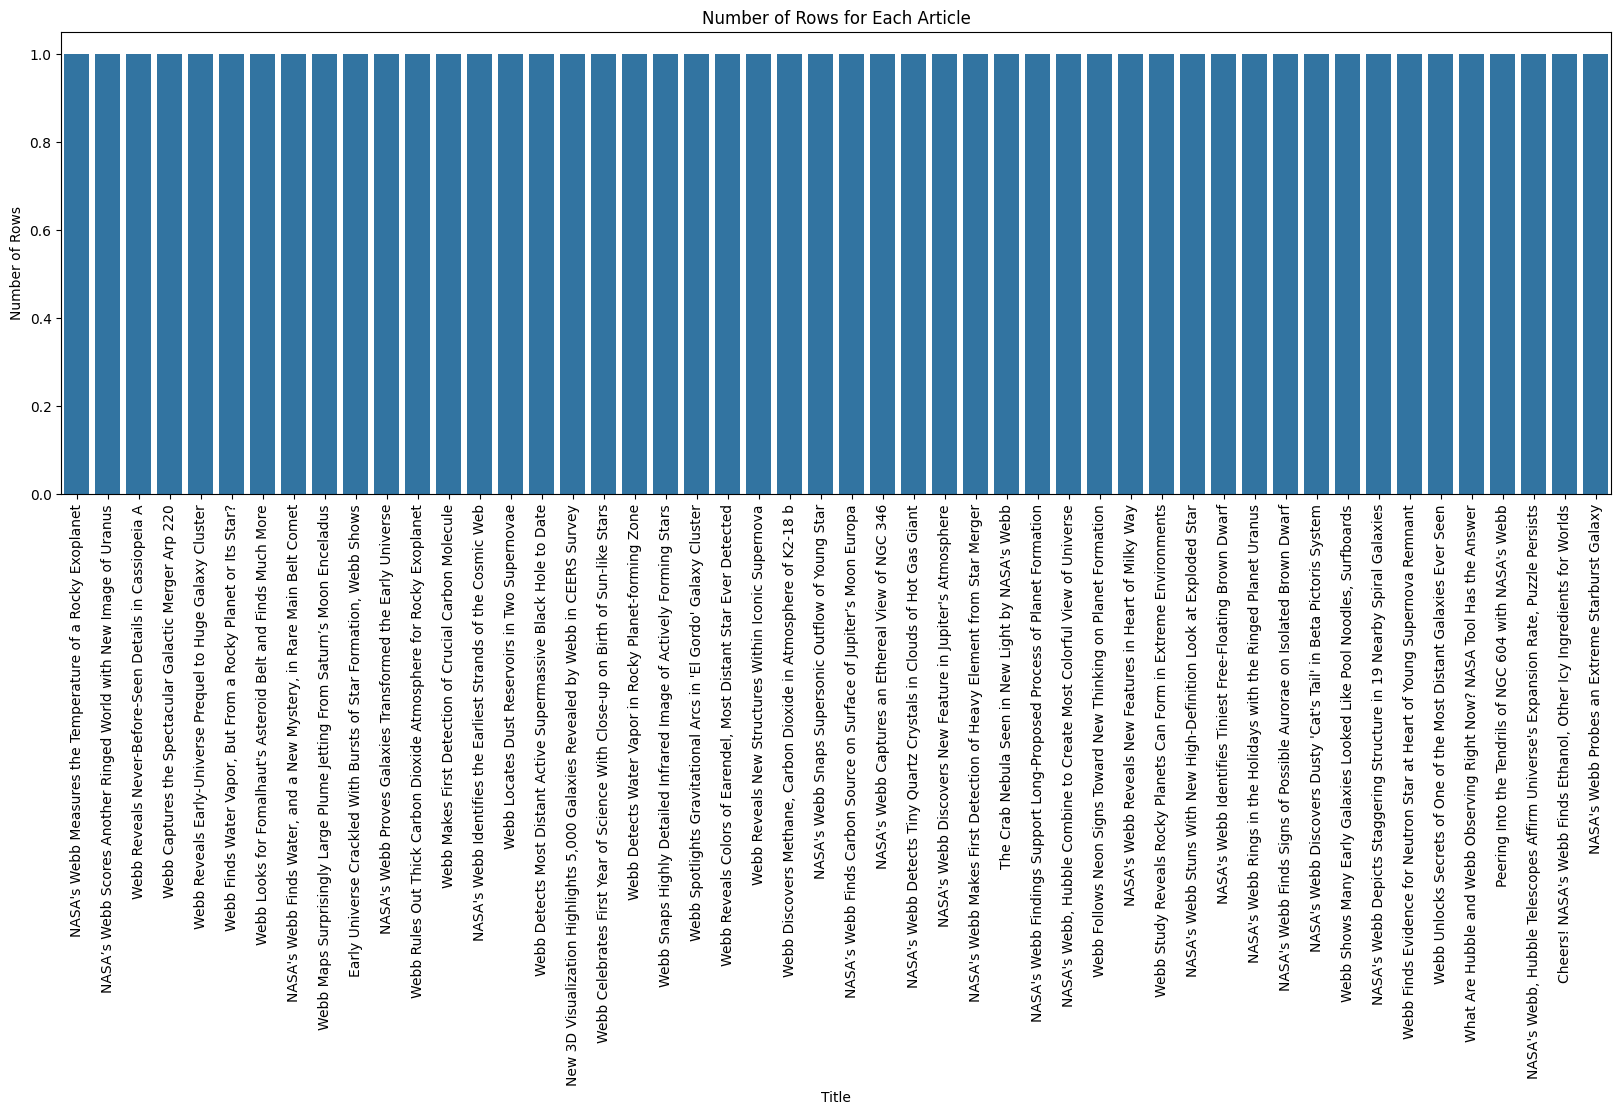

In [155]:
# now check again the number of unique titles and rows for each title
# now we are going to plot the number of rows for each article
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df["title"].value_counts() # this will give us the count or number of rows taken up by each
plt.figure(figsize=(20, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Title") 
plt.ylabel("Number of Rows")
plt.title("Number of Rows for Each Article")
plt.tight_layout()
plt.show()


In [156]:
# return those rows where title is repeated
repeated_titles = df[df.duplicated(subset=["title"], keep=False)]
repeated_titles

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19


In [157]:
# check if there are rows where summary is null
df[df["summary"].isnull() | df["para-1"].isnull() | df["title"].isnull()]

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19


In [158]:
df.head()

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19
0,1752149623-3,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Measures the Temperature of a Rock...,The amount of infrared light coming from TRAPP...,An international team of researchers has used ...,This is the first detection of any form of lig...,“These observations really take advantage of W...,"In early 2017, astronomers reported the discov...","TRAPPIST-1 b, the innermost planet, has an orb...",“There are ten times as many of these stars in...,...,The team used a technique called secondary ecl...,Webb’s detection of a secondary eclipse is its...,“There was also some fear that we’d miss the e...,The team analyzed data from five separate seco...,This research was conducted as part of Webb Gu...,“There was one target that I dreamed of having...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN
1,1752149626-21,https://webbtelescope.org/news/news-releases?i...,NASA’s Webb Scores Another Ringed World with N...,Webb's infrared image highlights the planet's ...,Following in the footsteps of the Neptune imag...,"The seventh planet from the Sun, Uranus is uni...",This infrared image from Webb’s Near-Infrared ...,"When Voyager 2 looked at Uranus, its camera sh...",On the right side of the planet there’s an are...,At the edge of the polar cap lies a bright clo...,...,"In 2022, the National Academies of Sciences, E...",The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752149631-34,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Never-Before-Seen Details in Cass...,Glowing dust and elements display complex stru...,"The explosion of a star is a dramatic event, b...",“Cas A represents our best opportunity to look...,"“Compared to previous infrared images, we see ...",Cassiopeia A is a prototypical supernova remna...,"The striking colors of the new Cas A image, in...",Interior to this outer shell lie mottled filam...,...,Among the science questions that Cas A may hel...,"However, existing observations of supernovae h...","“In Cas A, we can spatially resolve regions th...",Supernovae like the one that formed Cas A are ...,“By understanding the process of exploding sta...,The Cas A remnant spans about 10 light-years a...,The James Webb Space Telescope is the world’s ...,NaN,NaN,NaN
3,1752149635-52,https://webbtelescope.org/news/news-releases?i...,Webb Captures the Spectacular Galactic Merger ...,A Dazzling Display of Star Birth Captured in I...,Shining like a brilliant beacon amidst a sea o...,Located 250 million light-years away in the co...,The collision of the two spiral galaxies began...,Previous radio telescope observations revealed...,"On the outskirts of this merger, Webb reveals ...",Webb viewed Arp 220 with its Near-Infrared Cam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1752149639-61,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Early-Universe Prequel to Huge Ga...,"Protocluster Confirmed, 650 Million Years afte...","Every giant was once a baby, though you may ne...","“This is a very special, unique site of accele...",The precise measurements captured by Webb’s Ne...,The spectral data allowed astronomers to model...,“We can see these distant galaxies like small ...,Galaxy clusters are the greatest concentration...,...,“It is amazing the science we can now dream of...,The James Webb Space Telescope is the world's ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# total 21 para columns exist, make these into 7 columns
include_last = False
for i in range(1,17,3):
    if (i==16):
        include_last = True
    current_col = f"para-{i}"
    next_col = f"para-{i+1}"
    next_next_col = f"para-{i+2}"
    group_num = (i - 1) // 3 + 1
    new_content = df[current_col].fillna('') + ' ' + df[next_col].fillna('') + ' ' + df[next_next_col].fillna('')
    if include_last:
        new_content += ' ' + df[f"para-{i+3}"].fillna('')

    df[f"content-{group_num}"] = new_content
    # drop the current_col, next_col, next_next_col
    df = df.drop(columns=[current_col, next_col, next_next_col])
    if include_last:
        df = df.drop(columns=[f"para-{i+3}"])


In [160]:
df.sample(10)

,web-scraper-order,web-scraper-start-url,title,summary,content-1,content-2,content-3,content-4,content-5,content-6
41,1752149788-630,https://webbtelescope.org/news/news-releases?i...,Webb Shows Many Early Galaxies Looked Like Poo...,Hang Ten! Researchers using Webb found that ma...,Researchers analyzing images from NASA’s James...,Which category would our Milky Way galaxy fall...,"For decades, Hubble has wowed us with images o...",The James Webb Space Telescope is the world's ...,,
45,1752149808-688,https://webbtelescope.org/news/news-releases?i...,What Are Hubble and Webb Observing Right Now? ...,NASA's Space Telescope Live provides an intera...,It’s not hard to find out what NASA’s Hubble a...,Designed and developed for NASA by the Space T...,The zoomable sky map centered on the target’s ...,NASA’s Space Telescope Live is designed to wor...,,
13,1752149673-199,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Identifies the Earliest Strands of...,A filament of 10 galaxies seen just 830 millio...,Galaxies are not scattered randomly across the...,“This is one of the earliest filamentary struc...,Another part of the study investigates the pro...,Webb also provided the best evidence yet of ho...,,
37,1752149771-565,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Identifies Tiniest Free-Floating B...,Discovery helps answer question: How small can...,Brown dwarfs are objects that straddle the div...,"To locate this newfound brown dwarf, Luhman an...",This winnowing process led to three intriguing...,In addition to giving clues about the star-for...,Since the objects are well within the mass ran...,Future work may also include longer surveys th...
30,1752149742-449,https://webbtelescope.org/news/news-releases?i...,The Crab Nebula Seen in New Light by NASA's Webb,"Exquisite, never-before-seen details help unra...",NASA’s James Webb Space Telescope has gazed at...,"At first glance, the general shape of the supe...","To locate the Crab Nebula’s pulsar heart, trac...",The search for answers about the Crab Nebula’s...,NASA’s Universe of Learning materials are base...,
42,1752149797-642,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Depicts Staggering Structure in 19...,A new treasure trove of Webb images has arrive...,It’s oh-so-easy to be absolutely mesmerized by...,Excitement rapidly spread throughout the team ...,Something else that amazed astronomers? Webb’s...,What about galaxy cores that are awash in pink...,Don’t miss the images below: Webb’s images are...,
21,1752149707-322,https://webbtelescope.org/news/news-releases?i...,"Webb Reveals Colors of Earendel, Most Distant ...",Observations hint at companion star Detecting ...,NASA’s James Webb Space Telescope has followed...,Stars as massive as Earendel often have compan...,"Since Hubble’s discovery of Earendel, Webb has...",,,
27,1752149729-396,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Detects Tiny Quartz Crystals in Cl...,Flakes of silica “snow” fill the skies of puff...,Researchers using NASA’s James Webb Space Tele...,"The result from this team, which also includes...",What emerged was an unexpected “bump” at 8.6 m...,Unlike mineral particles found in clouds on Ea...,WASP-17 b is one of three planets targeted by ...,
49,1752149827-747,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Probes an Extreme Starburst Galaxy,Amid a site teeming with new and young stars l...,A team of astronomers has used NASA’s James We...,Star formation continues to maintain a sense o...,Looking at M82 in slightly longer infrared wav...,"Much to the team’s surprise, Webb’s view of th...","In the near future, the team will have spectro...",The James Webb Space Telescope is the world’s ...
1,1752149626-21,https://webbtelescope.org/news/news-releases?i...,NASA’s Webb Scores Another Ringed World with N...,Webb's infrared image highlights the planet's ...,Following in the footsteps of the Neptune imag...,"When Voyager 2 looked at Ura

In [161]:
# calulcate the average length of summary and paragraphs across all rows
summary_length = df["summary"].apply(lambda x: len(str(x).split())).mean()
summary_length

np.float64(83.6)

In [165]:
# for range in range(1, 7):
#     content_col = f"content-{range}"
#     content_length = df[content_col].apply(lambda x: len(str(x).split())).mean()
#     print(f"Average length of {content_col}: {content_length}")

In [166]:
# save the cleaned dataframe to a new csv file
df.to_csv('jwst_cleaned(2).csv', index=False)

In [167]:
# save only title and summary to a new csv file
df[['title', 'summary']].to_csv('jwst_titles_summaries(2).csv', index=False)